# Importing libraries

In [66]:
from itertools import cycle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Setting the plotting parameters

In [69]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams["figure.figsize"] = [20, 10]

# Training data

In [70]:
train_data = np.array(
    [[0, 0],[0, 1],[1, 0],[1, 1]])

target_xor = np.array(
    [[0],[1],[1],[0]])

target_nand = np.array(
    [[1],[1],[1],[0]])

target_or = np.array(
    [[0],[1],[1],[1]])

target_and = np.array(
    [[0],[0],[0],[1]])

# Perceptron class

In [38]:
class Perceptron:
    def __init__(self, train_data, target, lr=0.01, input_nodes=2):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.input_nodes = input_nodes
        self.w = np.random.uniform(size=self.input_nodes)
        self.b = -1
        self.node_val = np.zeros(self.input_nodes)

    def _gradient(self, node, exp, output):
        return node * (exp - output)

    def update_weights(self, exp, output):
        for i in range(self.input_nodes):
            self.w[i] += self.lr * self._gradient(self.node_val[i], exp, output)
        self.b += self.lr * self._gradient(1, exp, output)

    def forward(self, datapoint):
        return self.b + np.dot(self.w, datapoint)

    def classify(self, datapoint):
        if self.forward(datapoint) >= 0:
            return 1
        return 0
    
    def plot(self, h=0.01):
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(20, 20))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {0: "ro",1: "go"}

        # plotting the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],[self.train_data[i][1]],colors[self.target[i][0]],markersize=20)
        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)


    def train(self):
        # the number of consecutive correct classifications
        correct_counter = 0

        for train, target in cycle(zip(self.train_data, self.target)):
            # end if all points are correctly classified
            if correct_counter == len(self.train_data):
                break

            output = self.classify(train)
            self.node_val = train

            if output == target:
                correct_counter += 1
            else:
                # if incorrectly classified, update weights and reset correct_counter
                self.update_weights(target, output)
                correct_counter = 0
        

# Multilayer Network Perceptron

In [62]:
class MLP:
    def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs

        # initialize both sets of weights and biases randomly
        # weights_1: weights between input and hidden layer
        # weights_2: weights between hidden and output layer
        self.weights_1 = np.random.uniform(size=(num_input, num_hidden))
        self.weights_2 = np.random.uniform(size=(num_hidden, num_output))

        # b1: biases for the  hidden layer
        # b2: bias for the output layer
        self.b1 = np.random.uniform(size=(1,num_hidden))
        self.b2 = np.random.uniform(size=(1,num_output))

        self.losses = []
        
    def update_weights(self):
        
        # Calculate the squared error
        loss = 0.5 * (self.target - self.output_final) ** 2
        self.losses.append(np.sum(loss))

        error_term = (self.target - self.output_final)

        # the gradient for the hidden layer weights
        grad01 = self.train_data.T @ (((error_term * self._delsigmoid(self.output_final)) * self.weights_2.T) * self._delsigmoid(self.hidden_out))

        # the gradient for the output layer weights
        grad12 = self.hidden_out.T @ (error_term * self._delsigmoid(self.output_final))

        # updating the weights by the learning rate times their gradient
        self.weights_1 += self.lr * grad01
        self.weights_2 += self.lr * grad12

        # update the biases the same way
        self.b1 += np.sum(self.lr * ((error_term * self._delsigmoid(self.output_final)) * self.weights_2.T) * self._delsigmoid(self.hidden_out), axis=0)
        self.b2 += np.sum(self.lr * error_term * self._delsigmoid(self.output_final), axis=0)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _delsigmoid(self, x):
        return x * (1 - x)    
    
    def forward(self, batch):

        self.hidden_ = np.dot(batch, self.weights_1) + self.b1
        self.hidden_out = self._sigmoid(self.hidden_)

        self.output_ = np.dot(self.hidden_out, self.weights_2) + self.b2
        self.output_final = self._sigmoid(self.output_)

        return self.output_final

    def classify(self, datapoint):
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1

        return 0

    def plot(self, h=0.01):
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(10, 10))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {0: "ro",1: "go"}
        # plotting the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

    def train(self):
        for epoch in range(self.num_epochs):

            self.forward(self.train_data)
            self.update_weights()
            
            if epoch % 500 == 0:
                print("Loss: ", self.losses[epoch]) 

# Training the model

In [71]:
mlp = MLP(train_data, target_xor, 0.2, 1000)
mlp.train()

Loss:  0.7546330795336514
Loss:  0.4994328916577594


# Plotting the parameters and analyzing the results

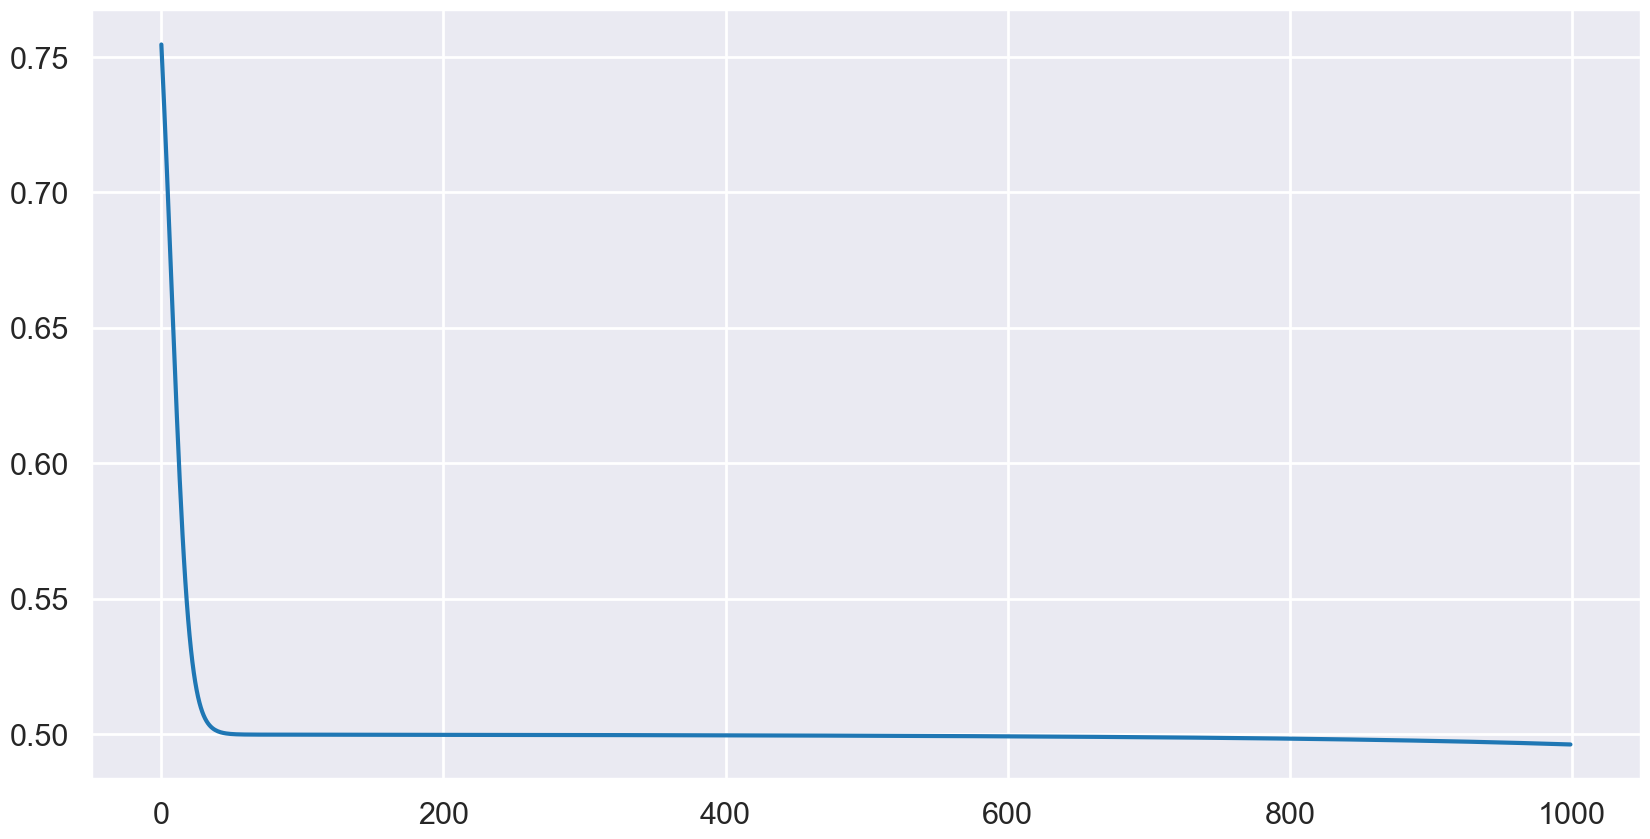

In [72]:
final = plt.plot(mlp.losses)

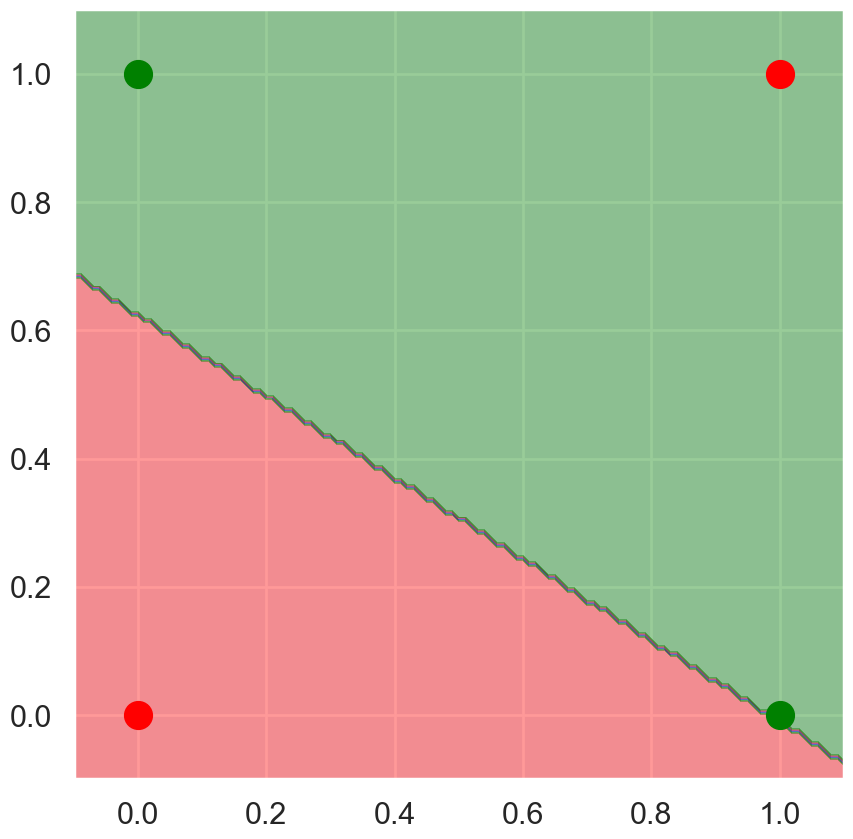

In [73]:
mlp.plot()